In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
Bigdata = pd.read_csv("regression_data.csv")
Bigdata

,X,Y
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440
...,...,...
95,0.987591,6.146963
96,1.045466,7.059295
97,0.855082,6.906398
98,0.050838,4.429206


<function matplotlib.pyplot.show(block=None)>

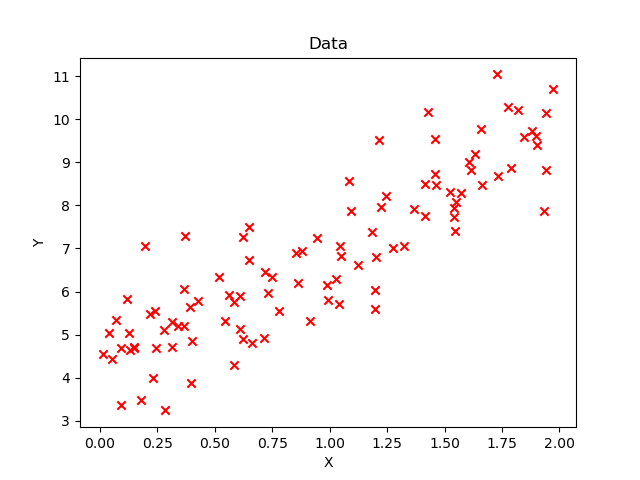

In [3]:
fig, ax = plt.subplots()
ax.scatter(Bigdata["X"], Bigdata["Y"], marker="x", c="r")
ax.set(xlabel="X", ylabel="Y",title="Data")
plt.show

In [4]:

def cost_func(w, b, data):
    X = data["X"].values
    Y = data["Y"].values
    m = len(data)
    j = 0
    y_preds = w * X + b
    j = np.sum((y_preds - Y) ** 2 )

    return j / (2 * m)


    

In [ ]:

def gradient_descent_vectorized(w, b, LR, data): 
    X = data["X"].values
    Y = data["Y"].values
    m = len(X)
    y_pred = w * X + b

    w_gradient = (1/m) * np.dot(X, (y_pred - Y))
    b_gradient = (1/m) * np.sum(y_pred - Y)

    w -= LR * w_gradient
    b -= LR * b_gradient
    
    return w, b


In [6]:
w = 0
b = 0
LR = 0.001
epochs = 3000
x_for_cont = np.zeros(30)
y_for_cont = np.zeros(30)

for i in range(epochs):
   w, b =  gradient_descent_vectorized(w, b, LR, Bigdata)
   if i%100 == 0:
      x_for_cont[i//100] = w
      y_for_cont[i//100] = b

w, b

(np.float64(3.290273561546546), np.float64(3.611077922296367))

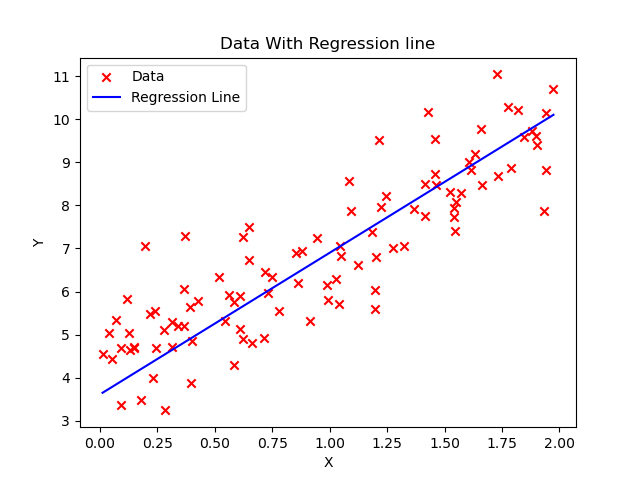

In [7]:
X_vals = np.linspace(Bigdata["X"].min(), Bigdata["X"].max(), 200)
Y_vals = w * X_vals + b
fig, ax = plt.subplots()
ax.scatter(Bigdata["X"], Bigdata["Y"], marker="x", c="r", label="Data")
ax.set(xlabel="X", ylabel="Y",title="Data With Regression line")
ax.plot(X_vals, Y_vals, c="b", label="Regression Line")
ax.legend()
plt.show()

In [8]:
cost = cost_func(w, b, Bigdata)
cost

np.float64(0.4573023074991479)

In [9]:
x_for_cont, y_for_cont

(array([0.00738408, 0.67245469, 1.21081381, 1.64616699, 1.99779208,
        2.28136611, 2.50963772, 2.69297409, 2.83980567, 2.95698785,
        3.05009516, 3.12366044, 3.18136943, 3.22621892, 3.26064546,
        3.28662999, 3.30578292, 3.31941337, 3.3285854 , 3.3341638 ,
        3.33685135, 3.33721902, 3.33573065, 3.33276293, 3.32862171,
        3.32355521, 3.31776481, 3.31141381, 3.30463454, 3.29753414]),
 array([0.00682   , 0.62381136, 1.12842233, 1.54159208, 1.88035019,
        2.15854676, 2.38744618, 2.57620998, 2.73228951, 2.86174536,
        2.969507  , 3.05958405, 3.13523805, 3.19912212, 3.25339461,
        3.29981144, 3.3398013 , 3.37452669, 3.40493368, 3.43179225,
        3.45572923, 3.47725498, 3.49678514, 3.51465832, 3.53115046,
        3.54648654, 3.56085009, 3.57439088, 3.58723127, 3.59947129]))

In [10]:
w_for_3d = np.linspace(3.29 -5 , 3.29 + 5, 100)
b_for_3d = np.linspace(3.61 -5, 3.61 + 5, 100)
w_for_grid, b_for_grid = np.meshgrid(w_for_3d, b_for_3d)
j_for_3d = np.zeros_like(w_for_grid)
for i in range(w_for_grid.shape[0]):
    for j in range(w_for_grid.shape[1]):
        j_for_3d[i,j] = cost_func(w_for_grid[i,j], b_for_grid[i,j], Bigdata)


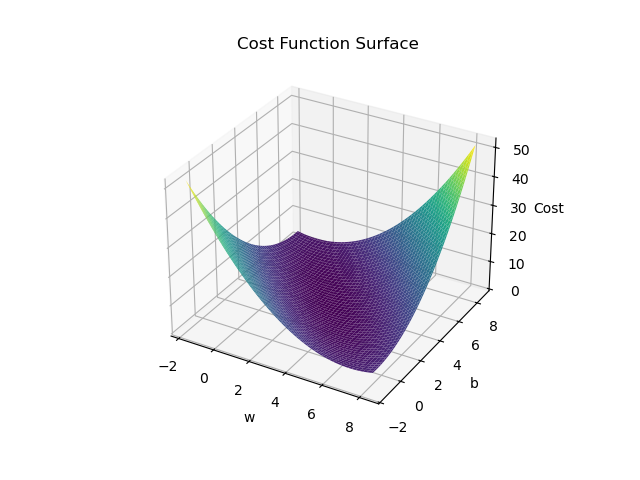

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_for_grid, b_for_grid, j_for_3d, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')
plt.show()

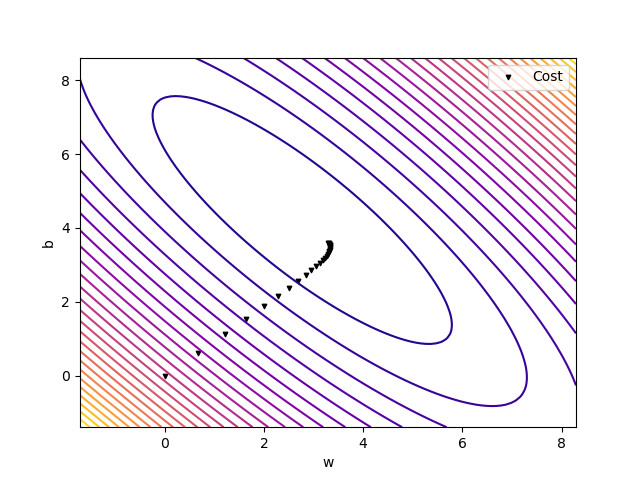

In [12]:
fig, ax = plt.subplots()
contour = ax.contour(w_for_grid, b_for_grid, j_for_3d, levels=30, cmap='plasma')
ax.scatter(x_for_cont,y_for_cont , c='black', marker='v', s=10, label="Cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
plt.legend()
plt.show()
